# 🛍️ Retail Sales – Exploratory Data Analysis (EDA)

This notebook explores the cleaned retail sales dataset and derives insights
that support the Retail Sales Analytics Dashboard.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:,.2f}".format)

df = pd.read_csv("../data/processed/sales_clean.csv", parse_dates=["date"])
df.head()


,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [2]:
df.info()
df.describe()
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    1000 non-null   int64         
 1   date              1000 non-null   datetime64[ns]
 2   customer_id       1000 non-null   object        
 3   gender            1000 non-null   object        
 4   age               1000 non-null   int64         
 5   product_category  1000 non-null   object        
 6   quantity          1000 non-null   int64         
 7   price_per_unit    1000 non-null   int64         
 8   total_amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


transaction_id      1000
date                 345
customer_id         1000
gender                 2
age                   47
product_category       3
quantity               4
price_per_unit         5
total_amount          18
dtype: int64

In [3]:
df.isna().sum()
df.duplicated(subset=["transaction_id"]).sum()
total_revenue = df["total_amount"].sum()
total_transactions = df["transaction_id"].nunique()
unique_customers = df["customer_id"].nunique()
avg_order_value = df["total_amount"].mean()

print("Total Revenue:", total_revenue)
print("Total Transactions:", total_transactions)
print("Unique Customers:", unique_customers)
print("Average Order Value:", avg_order_value)


Total Revenue: 456000
Total Transactions: 1000
Unique Customers: 1000
Average Order Value: 456.0


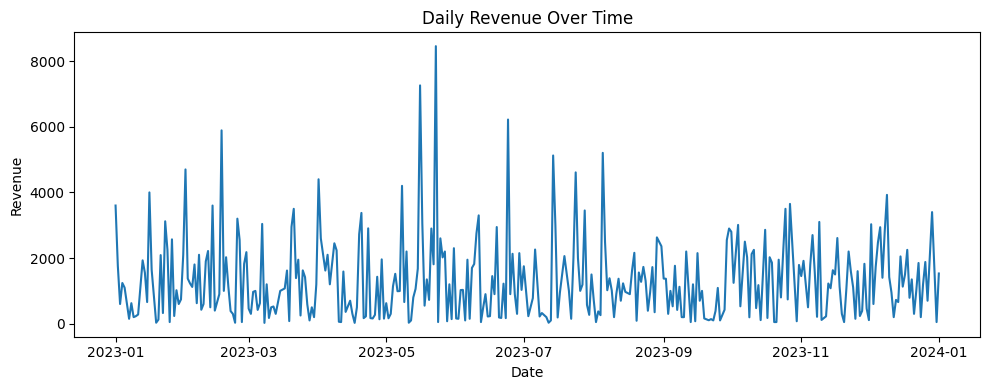

In [4]:
daily_rev = df.groupby("date")["total_amount"].sum().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(daily_rev["date"], daily_rev["total_amount"])
plt.title("Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


/var/folders/fq/_yh948317nn58xz70p7ypc8m0000gp/T/ipykernel_81609/1950907378.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index("date")


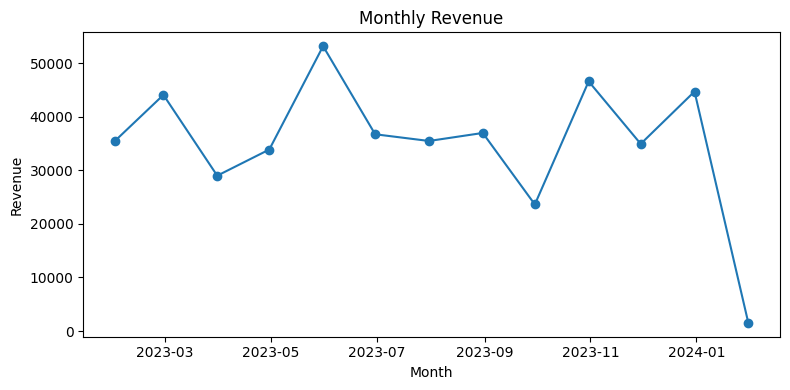

In [5]:
monthly_rev = (
    df.set_index("date")
      .resample("M")["total_amount"]
      .sum()
      .reset_index()
)

plt.figure(figsize=(8, 4))
plt.plot(monthly_rev["date"], monthly_rev["total_amount"], marker="o")
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


In [6]:
cat_perf = (
    df.groupby("product_category")
      .agg(
          total_revenue=("total_amount", "sum"),
          avg_price=("price_per_unit", "mean"),
          units_sold=("quantity", "sum"),
      )
      .sort_values("total_revenue", ascending=False)
)

cat_perf


,total_revenue,avg_price,units_sold
product_category,,,
Electronics,156905,181.90,849
Clothing,155580,174.29,894
Beauty,143515,184.06,771


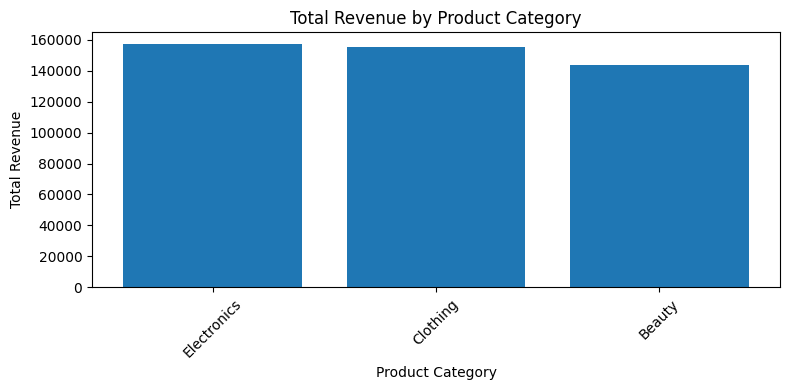

In [7]:
plt.figure(figsize=(8, 4))
plt.bar(cat_perf.index, cat_perf["total_revenue"])
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


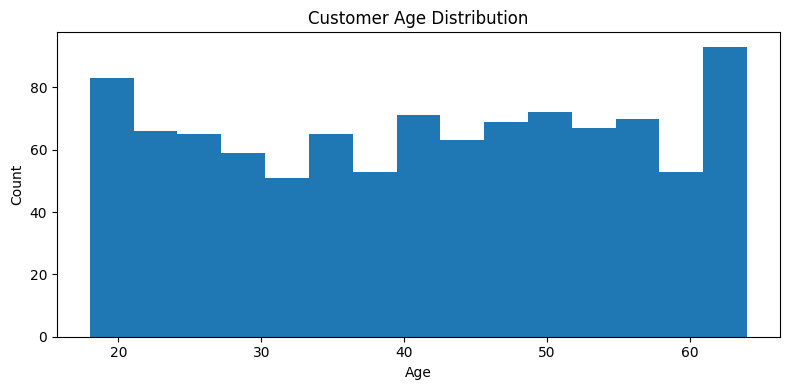

In [8]:
plt.figure(figsize=(8, 4))
plt.hist(df["age"], bins=15)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [9]:
gender_rev = df.groupby("gender")["total_amount"].sum().reset_index()
gender_rev


,gender,total_amount
0,Female,232840
1,Male,223160


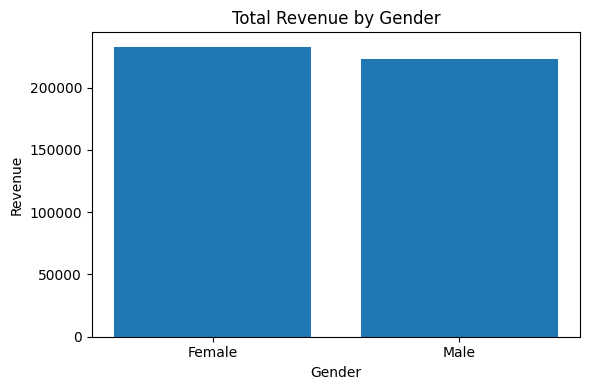

In [10]:
plt.figure(figsize=(6, 4))
plt.bar(gender_rev["gender"], gender_rev["total_amount"])
plt.title("Total Revenue by Gender")
plt.xlabel("Gender")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()
